### Note: Not all problems in this Jupyter Notebook are meant to be solved with Python. All problems are here to keep things organized in one place.

# Outline

In order of most to least requested, the top six topics for our section to review were:

1. SVD
2. (tie) Change of basis
2. (tie) Linear dynamical systems
4. Markov stochastic processes
5. (tie) Least squares fit
5. (tie) Projections

In order of most to least requested, the specific problems requested were (organzied into general types):


1. Fundamental subspaces of a matrix (e.g., rank, nullity, uniqueness of solutions) (8)
2. Gram-Schmidt (7)
3. Least squares fit and pseudoinverse (6)
3. General SVD (6)
5. Setting up a Markov Matrix (5)
5. Bases (note: the questions suggested often mixed things up with other ideas. This is a good sign that we need to review the language and ideas around bases!) (5)
5. Quiz problems (5)
8. Change of basis (4)
8. Linear dynamical systems (e.g., setup, coding, diagonalization) (4)
10. Properties of orthogonal matrices (3)
10. Plotting (3)
12. Projection onto a subspace and projection matrices (2)
12. Coding problems (2)
14. General diagonalization (1)
14. Matching transformations to their eigenvalues/eigenvectors (1)
14. Gauss-Jordan by hand (1)
14. Vector spaces (1)
14. General eigenvectors and eigenvalues (1)
14. Inner products (1)

**DISCLAIMER**: This review is customized to our section's responses for what you want to review. There are many topics that **WILL** be on the final that are not covered in this review. For more practice problems from sections not covered here, check the Final Review assignments from last year under In-class Assignments on D2L.

---
##### This question reviews Markov stochastic processes, linear dynamical systems, eigenvalues/eigenvectors, diagonalization, and change of basis.
1. Consider the following (fictional) situation. A study found that freshmen at MSU spend most of their time in one of three places: their dorm, the dining hall, or in class. After one hour, on average, students
    - in their dorm had a 35% chance of going to the dining hall, and a 20% chance of going to class (staying in their dorms the rest of the time)
    - in the dining hall had a 70% chance of going to their dorm, and a 10% chance of going to class
    - in class had a 50% chance of going to their dorm and a 40% chance of going to the dining hall.
    1. Write a Markov transition matrix to represent this situation. Let the first state be "in dorm", the second state be "in dining hall", and the third state be "in class".
    2. Explain mathematically why your matrix is a transition matrix.
    3. There are approximately 10,000 freshman at MSU. Find the steady state of approximately how many freshman are where on campus.
    4. Assume that all students start in their dorm. How many students are in each location after two hours? After the first day? **Important:** Solve this problem by repeatedly applying $A$ via **diagonalization**.

In [3]:
# A
import numpy as np
A = np.array([[0.45, 0.7, 0.5], [0.35, 0.2, 0.4], [0.2, 0.1, 0.1]])

A. $$A = 
\begin{bmatrix}
0.45 & 0.7 & 0.5 \\
0.35 & 0.2 & 0.4 \\
0.2 & 0.1 & 0.1
\end{bmatrix}
$$

Remember that each row and column corresponds to the given states in order. Each entry represents how people move **from** the column state **into** the row state. You can remember this by thinking about how matrix multiplication works with the state vector.

E.g., 40% of students go from class to dining hall. This is moving from third state into second state, so should go in column 3, row 2.

In [4]:
# B
np.allclose(np.sum(A, axis = 0), [1, 1, 1])

True

B. Columns all sum to one.

In [9]:
# C
d, C = np.linalg.eig(A)
# Tells us which eigenvalue is equal to 1
steady_state_index = np.isclose(d, 1)
# We then use this to index the columns of the eigenvector matrix
steady_state_vec = C[:, np.isclose(d, 1)]
# steady_state_vec is normalized. But we want its entries to sum
# to 10,000. So we divide by the sum of the entries and multiply
# by 10,000.
steady_state = 10000 * steady_state_vec / sum(steady_state_vec)
print(steady_state)

[[5354.33070866+0.j]
 [3110.23622047+0.j]
 [1535.43307087+0.j]]


Ignoring the complex part (this is complex roundoff error in `numpy`), we see that there are about 5354 students in their dorm, 3110 students in the dining hall, and 1535 students in class at any given time.

In [17]:
# D
initial = np.array([10000, 0, 0]).T  # Column vector

## Version in terms of change of basis
# Change of basis into basis of eigenvectors
initial_eig_basis = np.linalg.inv(C) @ initial
# Do repeated application of A in eigenvector basis
two_hours_eig_basis = np.diag(d ** 2) @ initial_eig_basis
# Change back to standard basis
two_hours = C @ two_hours_eig_basis
print(two_hours)
# Do same for 1 day
one_day_eig_basis = np.diag(d ** 24) @ initial_eig_basis
one_day = C @ one_day_eig_basis
print(one_day)

## Version using powers in terms of diagonalization
two_hours = C @ np.diag(d ** 2) @ np.linalg.inv(C) @ initial
print(two_hours)
one_day = C @ np.diag(d ** 24) @ np.linalg.inv(C) @ initial
print(one_day)

[5475.-1.0658141e-14j 3075.+1.0658141e-14j 1450.+0.0000000e+00j]
[5354.33070866+1.54074396e-33j 3110.23622047+0.00000000e+00j
 1535.43307087-2.31111593e-33j]
[5475.-8.67361738e-15j 3075.+4.33680869e-15j 1450.+4.33680869e-15j]
[5354.33070866+1.88079096e-33j 3110.23622047+0.00000000e+00j
 1535.43307087+0.00000000e+00j]


After two hours, there are about 5475 students in their dorm, 3075 in the dining hall, and 1450 in class. After a full day, the system has reached the steady state given in part (C).

Notice that we solved this in two ways that are equivalent. The first was using a change of basis of the initial vector into the basis of eigenvectors. Then we applied the diagonal form of $A$ (i.e., how $A$ works on vectors' representations in the eigenbasis) for as many hours as necessary. Then we changed back to the standard basis.

The second way is using the "power" property of diagonalization:
$$
A = CDC^{-1} \implies A^n = (CDC^{-1})(CDC^{-1})\cdots(CDC^{-1}) = CD^nC^{1}
$$
and the fact that the $n$th power of a diagonal matrix is the same as taking the $n$th power of each diagonal entry.

---
##### This question reviews the SVD, the pseudoinverse, and orthogonal matrices
2. Given a matrix $A \in \mathbb{R}^{m \times n}$:
    1. define its SVD. Be specific with how many matrices are involved, the size of each matrix, properties of each matrix, and how the matrices multiply to equal $A$.
    2. Given the `numpy` array `A`, write the code to compute its SVD (Hint: make sure all three **matrices** are accounted for).
    3. Write the formula for the pseudoinverse of $A$ in terms of its SVD.
    4. Show that if $A$ is invertible, then your answer to (B) is equal to the inverse of $A$.

A.

The SVD of $A$ is the formula
$$A = U \Sigma V^T,$$
where
- $U \in \mathbb{R}^{m \times m}$ is orthogonal.
- $\Sigma \in \mathbb{R}^{m \times n}$ is diagonal. The diagonal entries are the *singular values*, $\sigma_1, \ldots, \sigma_{\min(m,n)}$ of $A$. Only $\mathrm{rank}(A)$ many singular values are nonzero.
- $V \in \mathbb{R}^{n \times n}$ is orthogonal.

B.

```python
U, s, Vt = np.linalg.svd(A)
# Turn singular values into matrix
Sigma = np.zeros(shape(A))
Sigma[:len(s), :len(s)] = np.diag(s)
np.allclose(U @ Sigma @ Vt, A)  # Just a check, not necessary
```

C.

$$A^+ = V \Sigma^+ U^\top$$
where
$$\Sigma^+ =
\begin{bmatrix}
\frac{1}{\sigma_1} &  &  & & & &  \\
 & \frac{1}{\sigma_2} & & & & &  \\
& & \ddots & & & & \\
 &  &  & \frac{1}{\sigma_r} &  & &  \\
 &  &  &  & 0 & &  \\
 &  &  &  &  & \ddots &  \\
 &  &  &  &  &  & 0 \\
\end{bmatrix} \in \mathbb{R}^{n \times m}$$
(all empty entries are zero).

In `numpy`, we could make $\Sigma^+$ by doing
```python
_, s, _ = np.linalg.svd(A)
# Important! shape(Sigma_plus) == shape(A.T), not shape(A)
Sigma_plus = np.zeros(shape(A.T))
s = s[~np.isclose(s, 0)]  # Only use nonzero singular values
Sigma_plus[:len(s), :len(s)] = np.diag(1 / s)
```

D.

We can show this by multiplying $A$ and $A^+$:

$$
\begin{aligned}
AA^+
    &= (U \Sigma V^\top) (V \Sigma^+ U^\top) \\
    &= U \Sigma \Sigma^+ U^\top \quad\text{(since $V$ is orthogonal)}
\end{aligned}
$$

Since $A$ is invertible, it is square (and therefore so are $\Sigma$ and $\Sigma^+$) and full rank. This means $A$ has no zero singular values, so $\Sigma^+$ looks like
$$
\Sigma^+=
\begin{bmatrix}
\frac{1}{\sigma_1} & & & \\
& \frac{1}{\sigma_2} & & \\
& & \ddots & \\
& & & \frac{1}{\sigma_n}
\end{bmatrix}.
$$
When we multiply $\Sigma \Sigma^+$, we multiply the diagonal entries and therefore get the identity. So
$$AA^+ = U \Sigma \Sigma^+ U^\top = U U^\top = I$$
again using the fact that $U$ is orthogonal. Thus, $A^+$ must be the $A^{-1}$.

---
##### This question reviews span, linear independence, basis vectors, Gram-Schmidt, and projection onto subspaces

3. Consider the plane defined by the equation
$$x_1 - 2 x_2 = x_3 \quad \text{ for any $x_1, x_2 \in \mathbb{R}$}.$$
    1. Use the equation to come up with a spanning set for this plane.
    2. Check that this spanning set is basis for the plane.
    3. Perform the Gram-Schmidt procedure to create an orthonormal basis for the plane.
    4. Project the vector $$b = \begin{bmatrix} 3 \\1\\ -1\end{bmatrix}$$ onto the plane using your answer from part (C).

A.

Any vector that on the plane must have the form
$$\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}=
\begin{bmatrix}
x_1 \\
x_2 \\
x_1 - 2x_2
\end{bmatrix}
\quad \text{ for any $x_1, x_2 \in \mathbb{R}$}.
$$
If we split the $x_1$ and $x_2$ parts, we can write this as a linear combination of two vectors:
$$
\begin{bmatrix}
x_1 \\
x_2 \\
x_1 - 2x_2
\end{bmatrix}
=
\begin{bmatrix}
x_1 \\
0 \\
x_1
\end{bmatrix}
+
\begin{bmatrix}
0 \\
x_2 \\
- 2x_2
\end{bmatrix}
=
x_1 \begin{bmatrix}
1 \\
0 \\
1
\end{bmatrix}
+
x_2\begin{bmatrix}
0 \\
1 \\
- 2
\end{bmatrix}.
$$
Thus, the vectors
$$
\left\{
\begin{bmatrix}
1 \\ 0 \\ 1
\end{bmatrix},
\begin{bmatrix}
0 \\ 1 \\ -2
\end{bmatrix}\right\}
$$
are a spanning set for the plane.

B.

To show that these vectors form a basis for the plane, we need to check two things
1. They span the plane
2. They are linearly independent

We already know they span the plane from (A). Just to be very clear, we showed that any vector on the plane can be written as the linear combination
$$
x_1 \begin{bmatrix}
1 \\
0 \\
1
\end{bmatrix}
+
x_2\begin{bmatrix}
0 \\
1 \\
- 2
\end{bmatrix}.
$$
This means that the two vectors span the plane.

To show that they are linearly independent, we have to check that the only linear combination that equals the all-zero vector is where the coefficients are all zero. That is, we need to show that if
$$
x_1 \begin{bmatrix}
1 \\
0 \\
1
\end{bmatrix}
+
x_2\begin{bmatrix}
0 \\
1 \\
- 2
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 0 \\ 0
\end{bmatrix},
$$
then $x_1$ and $x_2$ have to be zero. This can be accomplished a few different ways:
- If we look at the first line of this equation, we see that $x_1$ would have to equal zero. The second line tells us that $x_2$ has to equal zero. So we've shown that $x_1$ and $x_2$ are equal to zero.
- When we have two vectors, it suffices to show that neither vector is a scalar multiple of the other. This is true, since any scalar multiple of the first vector will have a 0 in its second entry. But the second spanning vector has a 1 there.
- We could do Gauss-Jordan with these vectors as rows. If we end up with a row of all zeros in the reduced row echelon form, the vectors are **not** linearly independent (i.e., they are linearly dependent):
$$\begin{bmatrix}
1 & 0 & 1 \\
0 & 1 & -2
\end{bmatrix}...$$
well, this matrix is already in RREF, so we know they're linearly independent (this is what makes that first option so easy too).

**Note**: A common technique for showing that vectors are linearly indepedent is to make the matrix with these vectors as columns, and show that that matrix is invertible (by, e.g., showing it has a nonzero determinant, showing its RREF is the identity, showing it is full rank, actually computing its inverse, etc).

This doesn't work when you're trying to show that a set of vectors is a basis of a subspace with lower dimension than the length of the vectors! In our case, we have 2 vectors that are length 3. If we made that matrix, it would be a $3\times 2$ matrix. This isn't square, so it can't have an inverse!

C.

The Gram-Schmidt algorithm takes a list of linearly independent vectors $\{v_1, v_2, \ldots, v_n\}$ as input and returns an orthonormal list of vectors $\{w_1, w_2, \ldots w_n\}$.

- $w_1 \leftarrow \frac{v_1}{\|v_1\|}$  $\quad$
- for $i = {2, 3, \ldots, n}$
    - $w \leftarrow v_i$
    - for $j = {1, 2, \ldots, i}$
        - $w \leftarrow w - (v_i \cdot w_j) w_j$
    - $w_i \leftarrow \frac{w}{\| w \|}$
    
    
In simple language,
1. Normalize the first vector
2. Subtract the projection of the next vector onto the previous vectors from that vector
3. Normalize that vector
4. Repeat steps 2-3 for all remaining vectors

In this case
1. Normalize the first vector:
$$
w_1 = \frac{v_1}{\|v_1\|} =
\frac{1}{\sqrt{1^1 + 0^2 + 1^1}}
\begin{bmatrix}
1 \\
0 \\
1
\end{bmatrix}
=
\frac{1}{\sqrt{2}}\begin{bmatrix}
1 \\
0 \\
1
\end{bmatrix}$$
2. Subtract the projection of the next vector onto the previous vectors from that vector:
$$
\begin{aligned}
w 
    &= v_2 - \mathrm{proj}_{w_1}(v_2) \\
    &=
    \begin{bmatrix}
    0 \\
    1 \\
    - 2
    \end{bmatrix} -
    \left(
    \begin{bmatrix}
    0 \\
    1 \\
    - 2
    \end{bmatrix} \cdot \frac{1}{\sqrt{2}}
    \begin{bmatrix}
    1 \\
    0 \\
    1
    \end{bmatrix}
    \right)
    \frac{1}{\sqrt{2}}
    \begin{bmatrix}
    1 \\
    0 \\
    1
    \end{bmatrix}\\
    &=
    \begin{bmatrix}
    0 \\
    1 \\
    - 2
    \end{bmatrix} +
    \begin{bmatrix}
    1 \\
    0 \\
    1
    \end{bmatrix}\\
    &=
    \begin{bmatrix}
    1 \\
    1 \\
    -1
    \end{bmatrix}
\end{aligned}
$$
3. Normalize that vector
$$
w_2 = \frac{w}{\|w\|} = \frac{1}{\sqrt{1^1 + 1^2 + (-1)^2}}
\begin{bmatrix}
    1 \\
    1 \\
    -1
\end{bmatrix}
= \frac{1}{\sqrt{3}}
\begin{bmatrix}
    1 \\
    1 \\
    -1
\end{bmatrix}
$$
4. Repeat steps 2-3 for all remaining vectors:
We have no remaining vectors, so we're done!

Our final answer is that
$$
\{w_1, w_2\} = 
\left\{ \frac{1}{\sqrt{2}}\begin{bmatrix}
1 \\
0 \\
1
\end{bmatrix}, \frac{1}{\sqrt{3}}
\begin{bmatrix}
    1 \\
    1 \\
    -1
\end{bmatrix}\right\}$$
is an orthonormal basis for the plane.

In [51]:
# C
V = np.array([[1, 0, 1], [0, 1, -2]]).T  # Basis as columns of array

def proj(v1, v2):
    # Project the column vector v2 onto the column vector v1
    return (v2.T @ v1) * v1

def gram_schmidt(V):
    # Convert a basis of column vectors in array to orthonormal basis
    W = np.zeros(V.shape)
    for i in range(W.shape[1]): 
        W[:, i] = V[:, i]
        for j in range(i):
            # Subtract projection of v_i onto previous vectors
            W[:, i] = W[:, i] - proj(W[:, j], V[:, i])
        # Normalize vector
        W[:, i] = W[:, i] / np.linalg.norm(W[:, i])
    return W

W = gram_schmidt(V)
print(W)
# Check that it's equal to vectors computed by hand
w1 = np.array([[1, 0, 1]]).T / np.sqrt(2)
w2 = np.array([[1, 1, -1]]).T / np.sqrt(3)
print(np.allclose(W, np.hstack((w1, w2))))

[[ 0.70710678  0.57735027]
 [ 0.          0.57735027]
 [ 0.70710678 -0.57735027]]
True


D.

Let $W$ be the plane. To project a vector onto a subspace, we add the projection onto each basis vector.
$$
\begin{aligned}
\mathrm{proj}_W(b) 
    &= \mathrm{proj}_{w_1}(b) + \mathrm{proj}_{w_2}(b)\\
    &= (b \cdot w_1) w_1 + (b \cdot w_2) w_2 \\
    &= \left(
    \begin{bmatrix} 3 \\1\\ -1\end{bmatrix}
    \cdot
    \frac{1}{\sqrt{2}}
    \begin{bmatrix} 1 \\0 \\1\end{bmatrix}
    \right)
    \frac{1}{\sqrt{2}}
    \begin{bmatrix} 1 \\0 \\1\end{bmatrix}
    + \left(
    \begin{bmatrix} 3 \\1\\ -1\end{bmatrix}
    \cdot
    \frac{1}{\sqrt{3}}
    \begin{bmatrix} 1 \\1 \\-1\end{bmatrix}
    \right)
    \frac{1}{\sqrt{3}}
    \begin{bmatrix} 1 \\1 \\-1\end{bmatrix}\\
    &= \begin{bmatrix} 1 \\0 \\1\end{bmatrix}
    +
    \frac{5}{3}
    \begin{bmatrix} 1 \\1 \\-1\end{bmatrix}\\
    &=
    \frac{1}{3}
    \begin{bmatrix}8 \\5\\-2\end{bmatrix}
\end{aligned}
$$

In [80]:
# D
b = np.array([[3, 1, -1]]).T

# Shortcut for computing dot products, then taking linear combination
b_proj = W @ W.T @ b

# An alternative is
b_proj = np.zeros((W.shape[0], 1))
for i in range(W.shape[1]):
        b_proj[:, 0] = b_proj[:, 0] + proj(W[:, i], b)
        
print(b_proj)
# Check that it's equal to projection computed by hand
print(np.allclose(b_proj, np.array([[8, 5, -2]]).T / 3))

[[ 2.66666667]
 [ 1.66666667]
 [-0.66666667]]
True


---
##### This question reviews row space, column space, null space, rank, nullity, Gauss-Jordan and uniqueness of solutions

4. Consider the matrix
$$
A = \begin{bmatrix}
1 & -1 & -2 & 4\\
-2 & 1 & 3 & -7\\
1 & 0 & -1 & 3
\end{bmatrix}
$$
    1. Find a basis for the row space of $A$.
    2. Find a basis for the column space of $A$.
    3. Find a basis for the range of $A$.
    4. What is $\mathrm{rank}(A)$?
    5. What is the dimension of the null space of $A$?
    6. What is the dimension of the null space of $A^\top$?
    7. Find a basis for the null space of $A$.
    8. Consider the system $Ax = b$ where $b$ is given by the vectors below. Are there
    
        (i) infinitely many solutions
        
        (ii) one unique solution
        
        (iii) no solutions
        
        (iv) not enough information
        
        1. $$b=\begin{bmatrix}2\\-2\\0\end{bmatrix}$$
        
        2. $$b=\begin{bmatrix}0\\0\\0\end{bmatrix}$$
        
        3. $$b=\begin{bmatrix}0\\1\\0\end{bmatrix}$$

A.

We do Gauss-Jordan on $A$ (by hand, no `sympy` on final!). The nonzero rows in its RREF are a basis for the row space.

$$
\begin{aligned}
\begin{bmatrix}
1 & -1 & -2 & 4\\
-2 & 1 & 3 & -7\\
1 & 0 & -1 & 3
\end{bmatrix}
    &\underrightarrow{R_2 \leftarrow 2 R_1 + R_2}
    \begin{bmatrix}
    1 & -1 & -2 & 4\\
    0 & -1 & -1 & 1\\
    1 & 0 & -1 & 3
    \end{bmatrix}\\
    &\underrightarrow{R_3 \leftarrow - R_1 + R_3}
    \begin{bmatrix}
    1 & -1 & -2 & 4\\
    0 & -1 & -1 & 1\\
    0 & 1 & 1 & -1
    \end{bmatrix}\\
    &\underrightarrow{R_3 \leftarrow R_2 + R_3}
    \begin{bmatrix}
    1 & -1 & -2 & 4\\
    0 & -1 & -1 & 1\\
    0 & 0 & 0 & 0
    \end{bmatrix}\\
    &\underrightarrow{R_1 \leftarrow R_1 - R_2}
    \begin{bmatrix}
    1 & 0 & -1 & 3\\
    0 & -1 & -1 & 1\\
    0 & 0 & 0 & 0
    \end{bmatrix}\\
    &\underrightarrow{R_2 \leftarrow -R_2}
    \begin{bmatrix}
    1 & 0 & -1 & 3\\
    0 & 1 & 1 & -1\\
    0 & 0 & 0 & 0
    \end{bmatrix}
\end{aligned}
$$

So a basis for the row space of $A$ is
$$
\left\{\begin{bmatrix}1\\0\\-1\\3\end{bmatrix}, \begin{bmatrix}0\\1\\1\\-1\end{bmatrix}\right\}
$$
(it doesn't matter whether you write them as row vectors or column vectors, I'm just using the convention that we usuall write vectors as column vectors).

B.

We do Gauss-Jordan on $A^\top$ (by hand, no `sympy` on final!). The nonzero rows in its RREF are a basis for the column space.
$$
\begin{aligned}
\begin{bmatrix}
1 & -2 & 1 \\
-1 & 1 & 0 \\
-2 & 3 & -1 \\
4 & -7 & 3
\end{bmatrix}
    &\underrightarrow{R_2 \leftarrow R_1 + R_2}
    \begin{bmatrix}
    1 & -2 & 1 \\
    0 & -1 & 1 \\
    -2 & 3 & -1 \\
    4 & -7 & 3
    \end{bmatrix}\\
    &\underrightarrow{R_3 \leftarrow 2 R_1 + R_3}
    \begin{bmatrix}
    1 & -2 & 1 \\
    0 & -1 & 1 \\
    0 & -1 & 1 \\
    4 & -7 & 3
    \end{bmatrix}\\
    &\underrightarrow{R_4 \leftarrow -4 R_1 + R_4}
    \begin{bmatrix}
    1 & -2 & 1 \\
    0 & -1 & 1 \\
    0 & -1 & 1 \\
    0 & 1 & -1
    \end{bmatrix}\\
    &\underrightarrow{R_3 \leftarrow - R_2 + R_3}
    \begin{bmatrix}
    1 & -2 & 1 \\
    0 & -1 & 1 \\
    0 & 0 & 0 \\
    0 & 1 & -1
    \end{bmatrix}\\
    &\underrightarrow{R_4 \leftarrow R_2 + R_4}
    \begin{bmatrix}
    1 & -2 & 1 \\
    0 & -1 & 1 \\
    0 & 0 & 0 \\
    0 & 0 & 0
    \end{bmatrix}\\
    &\underrightarrow{R_2 \leftarrow - R_2}
    \begin{bmatrix}
    1 & -2 & 1 \\
    0 & 1 & -1 \\
    0 & 0 & 0 \\
    0 & 0 & 0
    \end{bmatrix}\\
    &\underrightarrow{R_1 \leftarrow R_1 + 2 R_2}
    \begin{bmatrix}
    1 & 0 & -1 \\
    0 & 1 & -1 \\
    0 & 0 & 0 \\
    0 & 0 & 0
    \end{bmatrix}
\end{aligned}
$$

So a basis for the column space of $A$ is
$$
\left\{ \begin{bmatrix}1\\0\\-1\end{bmatrix},  \begin{bmatrix}0\\1\\-1\end{bmatrix}\right\}
$$

C.

The range is the same as the column space. So a basis for the range of $A$ is 
$$
\left\{ \begin{bmatrix}1\\0\\-1\end{bmatrix},  \begin{bmatrix}0\\1\\-1\end{bmatrix}\right\}
$$

D.

The rank of $A$ can be computed using any of these techniques:
1. The number of linearly independent rows of $A$
2. The number of linearly independent columns of $A$
3. The number of pivots in the RREF of $A$
4. The dimension of the row space
5. The dimension of the column space/range
6. The number of nonzero singular values of $A$

Remember:

- A pivot is a column (or row) in the RREF that has a leading 1.
- The dimension of a subspace is the length of a basis.
- The singular values are the largest $\min(m, n)$ eigenvalues of $AA^\top$ or $A^\top A$.
    
We've effectively computed the first five options. So $\mathrm{rank}(A) = 2$.

E.

The rank-nullity theorem states that
$$\mathrm{rank}(A) + \mathrm{nullity}(A) = n$$
where $n$ is the number of columns of $A$, and $\mathrm{nullity}(A)$ is the dimension of the row space. Since $\mathrm{rank}(A) = 2$, and there are $4$ columns, $\mathrm{nullity}(A) = 2$.

F. 

We could use the rank-nullity theorem on $A^\top$:
$$\mathrm{rank}(A^\top) + \mathrm{nullity}(A^\top) = m$$
where $m$ is the number of rows of $A$ (i.e., the number of columns of $A^\top$). Since the rows of $A^\top$ are the columns of $A$ (and vice versa), looking at many of the ways to compute rank shows that $\mathrm{rank}(A^\top) = \mathrm{rank}(A)$. So since there are $3$ rows of $A$, and $\mathrm{rank}(A) = 2$, the dimension of the null space of $A^\top$ is $1$.

G.

The definition of the null space of $A$ is the set of solutions to $Ax = 0$. In set notation, we write this as
$$
\mathrm{null}(A) = \left\{x \in \mathbb{R}^n : Ax = 0\right\}
$$
We have to solve the system
$$
\begin{bmatrix}
1 & -1 & -2 & 4\\
-2 & 1 & 3 & -7\\
1 & 0 & -1 & 3
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\x_3\\x_4
\end{bmatrix}
=
\begin{bmatrix}
0\\0\\0
\end{bmatrix}.
$$
We should be expecting infinitely many solutions (why?), so we have to solve this using Gauss-Jordan on the augmented matrix
$$
\begin{bmatrix}
1 & -1 & -2 & 4 &\mid& 0\\
-2 & 1 & 3 & -7 &\mid& 0\\
1 & 0 & -1 & 3 &\mid& 0
\end{bmatrix}
$$

If we do the exact same steps for finding the RREF of $A$ as in part (A) on this augmented matrix, we will get the same result, and the zeros won't change (no row operations can change them from zero). This leaves us with the augmented matrix
$$
\begin{bmatrix}
    1 & 0 & -1 & 3 & \mid& 0\\
    0 & 1 & 1 & -1 & \mid& 0\\
    0 & 0 & 0 & 0 & \mid& 0
\end{bmatrix}.
$$
Since we only have $3$ rows for four variables, $x_4$ will always be free. Since we have a row of all zeros, $x_3$ is also free. The first two equations tell us
$$
x_1 - x_3 + 3x_4 = 0 \implies x_1 = x_3 - 3x_4
$$
and
$$
x_2 + x_3 - x_4 = 0 \implies x_2 = -x_3 + x_4.
$$
So the null space is the set of all $x$ in the form
$$
x =
\begin{bmatrix}
x_1\\x_2\\x_3\\x_4
\end{bmatrix}
=
\begin{bmatrix}
x_3 - 3x_4\\-x_3 + x_4\\x_3\\x_4
\end{bmatrix}\quad\text{for any $x_3, x_4 \in \mathbb{R}$.}
$$

If we separate this into a linear combination of two vectors, we get
$$
x =
\begin{bmatrix}
x_3 - 3x_4\\-x_3 + x_4\\x_3\\x_4
\end{bmatrix}
=
x_3 \begin{bmatrix}1 \\-1\\1\\0\end{bmatrix}
+
x_4 \begin{bmatrix}-3\\1\\0\\1\end{bmatrix}
\quad\text{for any $x_3, x_4 \in \mathbb{R}$.}
$$

Thus,
$$
\left\{\begin{bmatrix}1 \\-1\\1\\0\end{bmatrix}, \begin{bmatrix}-3\\1\\0\\1\end{bmatrix}\right\}
$$
are a spanning set for the null space of $A$. Since we know the dimension of the null space of $A$ is 2, this must also be a basis for the null space of $A$.

H.

Since this matrix has a null space that is more than just the zero vector, we know immediately that it never has a unique solution for any system.

Why? Pick a nonzero vector in the null space and call it $x_0$. This means that $Ax_0 = 0$. Now, if $x$ is any solution to $Ax = b$, we have
$$A(x + x_0) = Ax + Ax_0 = Ax = b.$$
So $x + x_0$ is also a solution. Since there are infinitely many nonzero vectors in the null space (i.e., any nonzero linear combination of the basis in part (G)), there are infinitely many solutions to any system that has one solution.

So we will never answer with (ii).

a. Again, `numpy` won't work for us since $A$ isn't square. We can do Gauss-Jordan on the augmented system $[A \mid b]$, and this will tell us if there's a solution. It's good practice, so we'll try it in part (c) below. But we'll do it another way here.

Asking whether $Ax = b$ has a solution is the same as asking whether $b$ is in the range of $A$ (why?). We have a basis of the range of $A$, so this is the same as asking if there's a linear combination
$$
c_1\begin{bmatrix}1\\0\\-1\end{bmatrix} + c_2\begin{bmatrix}0\\1\\-1\end{bmatrix} = \begin{bmatrix}2 \\ -2 \\ 0\end{bmatrix}.
$$
By inspection, we can see that for the first line to work out, $c_1 = 2$ and for the second line to work out, $c_2 = 2$. The last line in that case would be $2 \times -1 + 2 \times 1 = 0$ which is true! So there is a linear combination that works, $b$ is in the range of $A$, and the system has infinitely many solutions. So (i).

Interestingly, we didn't actually compute a solution for $Ax = b$, but we know there are infinitely many. Can you figure out how to get a solution without Gauss-Jordan? (Hint: pseudoinverses work in more than just overdetermined cases...)

b. The null space is the set of all solutions to this problem. Any linear combination of the basis vectors in part (G) are a solution. Since there are infinitely many linear combinations, there are infinitely many solutions. So (i).

c. As suggested in (a) above, let's do Gauss-Jordan. It will be the exact same steps as computing the basis of the row space, we just take the right hand side along for the ride:

$$
\begin{aligned}
\begin{bmatrix}
1 & -1 & -2 & 4 & \mid & 0\\
-2 & 1 & 3 & -7 & \mid & 1\\
1 & 0 & -1 & 3 & \mid & 0
\end{bmatrix}
    &\underrightarrow{R_2 \leftarrow 2 R_1 + R_2}
    \begin{bmatrix}
    1 & -1 & -2 & 4 & \mid & 0\\
    0 & -1 & -1 & 1 & \mid & 1\\
    1 & 0 & -1 & 3 & \mid & 0
    \end{bmatrix}\\
    &\underrightarrow{R_3 \leftarrow - R_1 + R_3}
    \begin{bmatrix}
    1 & -1 & -2 & 4 & \mid & 0\\
    0 & -1 & -1 & 1 & \mid & 1\\
    0 & 1 & 1 & -1 & \mid & 0
    \end{bmatrix}\\
    &\underrightarrow{R_3 \leftarrow R_2 + R_3}
    \begin{bmatrix}
    1 & -1 & -2 & 4 & \mid & 0\\
    0 & -1 & -1 & 1 & \mid & 1\\
    0 & 0 & 0 & 0 & \mid & 1
    \end{bmatrix}\\
    &\underrightarrow{R_1 \leftarrow R_1 - R_2}
    \begin{bmatrix}
    1 & 0 & -1 & 3 & \mid & -1\\
    0 & -1 & -1 & 1 & \mid & 1\\
    0 & 0 & 0 & 0 & \mid & 1
    \end{bmatrix}\\
    &\underrightarrow{R_2 \leftarrow -R_2}
    \begin{bmatrix}
    1 & 0 & -1 & 3 & \mid & -1\\
    0 & 1 & 1 & -1 & \mid & -1\\
    0 & 0 & 0 & 0 & \mid & 1
    \end{bmatrix}
\end{aligned}
$$

The last row would require that $0 = 1$. This isn't possible, so there are no solutions.

---
##### This question reviews least squares, the pseudoinverse, column space, projection matrices, and (optionally) plotting
5. Consider the list of $(x, y)$ points
$$\begin{matrix}
(-0.5, & 0.1)\\
(-1, & 2)\\
(1, & 2)\\
(2, & 5)\\
(2.5, & 6)\\
\end{matrix}
$$
    1. Come up with an overdetermined system $Ax = b$ whose least squares solution $c = [c_0, c_1, c_2]^\top$ gives the quadratic of best fit $y = c_0 + c_1 x + c_2 x^2$ through these points.
    2. Solve this system using the normal equations.
    3. Solve this system using the left inverse.
    4. Write the matrix that projects a vector in $\mathbb{R}^5$ onto the column space of $A$.
    5. Check that your least squares solution solves $Ac = \mathrm{proj}_{\mathrm{col}(A)}(b)$.
    6. (Optional) Plot the points and the quadratic of best fit.

A.

These 5 points give us five equations for three unknowns:
$$
\begin{matrix}
c_0 &+ & c_1 \cdot (-0.5) &+ & c_2 \cdot (-0.5)^2 &= 0.1 \\
c_0 &+ & c_1 \cdot (-1) &+ & c_2 \cdot (-1)^2 &= 2 \\
c_0 &+ & c_1 \cdot 1 &+ & c_2 \cdot 1^2 &= 2 \\
c_0 &+ & c_1 \cdot 2 &+ & c_2 \cdot 2^2 &= 5 \\
c_0 &+ & c_1 \cdot 2.5 &+ & c_2 \cdot 2.5^2 &= 6
\end{matrix}
$$

In matrix form:
$$
\begin{bmatrix}
1 & -0.5 & (-0.5)^2\\
1 & -1 & (-1)^2\\
1 & 1 & 1^2\\
1 & 2 & 2^2\\
1 & 2.5 & 2.5^2
\end{bmatrix}
\begin{bmatrix}
c_0 \\ c_1 \\c_2
\end{bmatrix}
=
\begin{bmatrix}
0.1 \\
2 \\
2\\
5\\
6
\end{bmatrix}
$$

So
$$
A = \begin{bmatrix}
1 & -0.5 & (-0.5)^2\\
1 & -1 & (-1)^2\\
1 & 1 & 1^2\\
1 & 2 & 2^2\\
1 & 2.5 & 2.5^2
\end{bmatrix}, \qquad
b = \begin{bmatrix}
0.1 \\
2 \\
2\\
5\\
6
\end{bmatrix}
$$

In [92]:
# B

A = np.ones((5, 3))
x = np.array([-0.5, -1, 1, 2, 2.5])
A[:, 1] = x
A[:, 2] = x ** 2

b = np.array([[0.1, 2, 2, 5, 6]]).T

c = np.linalg.solve(A.T @ A, A.T @ b)
print(c)

array([[0.82697495],
       [0.20635838],
       [0.81117534]])

In [94]:
# C

A_left_inv = np.linalg.inv(A.T @ A) @ A.T
c = A_left_inv @ b
print(c)

[[0.82697495]
 [0.20635838]
 [0.81117534]]


D.

The least squares solution is the vector $c$ so that $\|Ac - b\|$ is minimized. This is the same as saying that $Ac$ is the vector in the range/column space of $A$ closest to $b$. Thus, $Ac$ is actually the projection of $b$ onto the column space of $A$.

We can find $c$ by applying the left inverse to $b$:

$$c = (A^\top A)^{-1} A.T b \implies \mathrm{proj}_{\mathrm{col}(A)}(b) = Ac = A (A^\top A)^{-1} A^\top b.$$

For any vector in $\mathbb{R}^5$ then, the projection matrix onto the range of $A$ is
$$A (A^\top A)^{-1} A^\top$$

In [98]:
# D
proj_mat = A @ np.linalg.inv(A.T @ A) @ A.T
print(proj_mat)

[[ 0.4026975   0.38728324  0.27552987  0.04624277 -0.11175337]
 [ 0.38728324  0.74566474 -0.15606936 -0.07514451  0.0982659 ]
 [ 0.27552987 -0.15606936  0.71483622  0.29479769 -0.12909441]
 [ 0.04624277 -0.07514451  0.29479769  0.36416185  0.3699422 ]
 [-0.11175337  0.0982659  -0.12909441  0.3699422   0.77263969]]


In [102]:
# E
np.allclose(A @ c, proj_mat @ b)

True

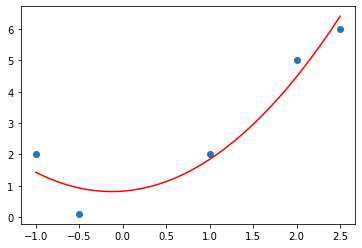

In [108]:
# F
import matplotlib.pyplot as plt
plt.scatter(x, b.ravel())  # Need b as a 1d array
x_quad = np.linspace(min(x), max(x))
y_quad = c[0] + c[1] * x_quad + c[2] * (x_quad ** 2)
plt.plot(x_quad, y_quad, 'r')